@Code written by: Sandeep Kumar, Wrana Lab, LTRI, Mount Sinai Hospital, Toronto 

# Introduction

We can write a brief about the algorithm here.

In [22]:
# matplotlib is a commonly used package for plotting
import matplotlib.pyplot as plt
# pandas is a package used for making the handling of large data sets easier 
import pandas as pd
# numpy is very common package for handling arrays and matrices
import numpy as np
from scipy.spatial.distance import squareform, pdist, euclidean

import datetime

# this line tells matplotlib to plot results inline with the current jupyter notebook
%matplotlib inline

from random import seed
from random import choice
from random import shuffle

from sklearn.preprocessing import StandardScaler

import seaborn as sns; 
sns.set()

import os #chdir, getcwd(), walk

#For Kmean clustering
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from random import uniform
from math import cos, sin, pi
from numpy import outer, arange
from pylab import *

from math import log, exp

from sympy.combinatorics.graycode import gray_to_bin

from time import gmtime, strftime
#Set the working directory

import struct as st

In [23]:
print(datetime.datetime.now())
t1 = datetime.datetime.now()

2019-02-11 11:23:16.189000


In [24]:
def performPCAAnalysis(dataForProcessing, numberofPCs):
        pca = PCA(n_components=numberofPCs)
        pcaReducedData = pca.fit_transform(dataForProcessing)
        plt.plot(pca.explained_variance_ratio_)
        plt.xlabel('PCA #')
        plt.ylabel('Explained variance')
        plt.savefig("PCAAnalysis.png", frameon = True)
        plt.show()
        
        return pcaReducedData
    
def calculateScoreForKMeanClustering(pcaReducedData, maxNoOfClusters):
    
        Nc = range(1, maxNoOfClusters)
        kmeans = [KMeans(n_clusters=i) for i in Nc]
        score = [kmeans[i].fit(pcaReducedData).score(pcaReducedData) for i in range(len(kmeans))]
        plt.plot(Nc,score)
        plt.xlabel('Number of Clusters')
        plt.ylabel('Score')
        plt.title("ClusteringScore")
        plt.savefig("ClusteringScore.png")
        plt.show()
        
        return

def performtSNEAnalysis(pcaReducedData,noOfClusters):

            X_embedded = TSNE(n_components=2, n_iter=1000, verbose=3).fit_transform(pcaReducedData)

            kmeans = KMeans(n_clusters=noOfClusters, random_state=0).fit(pcaReducedData)
            plt.scatter(X_embedded[:,0],X_embedded[:,1],c = kmeans.labels_, cmap='gist_rainbow', alpha=0.3)
            plt.colorbar()
            plt.savefig('LabelledtSNE.png')
            plt.show()
            
            return X_embedded

In [25]:
os.chdir('//labdata2.ad.mshri.on.ca/wrana_lab/skumar/Computational/COMP10_AsadPaper/Set2/')

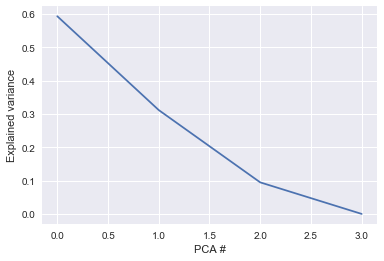

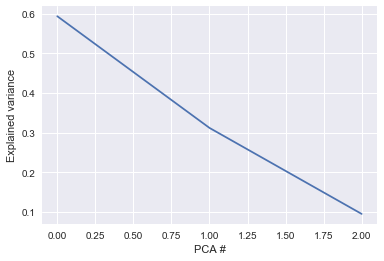

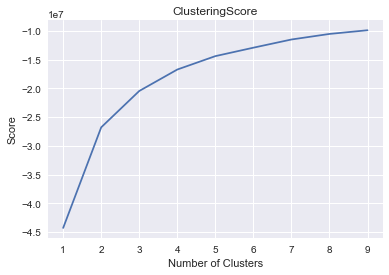

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1518 samples in 0.000s...
[t-SNE] Computed neighbors for 1518 samples in 0.045s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1518
[t-SNE] Computed conditional probabilities for sample 1518 / 1518
[t-SNE] Mean sigma: 9.977585
[t-SNE] Computed conditional probabilities in 0.148s
[t-SNE] Iteration 50: error = 70.3002853, gradient norm = 0.1267061 (50 iterations in 5.173s)
[t-SNE] Iteration 100: error = 66.6773300, gradient norm = 0.0592403 (50 iterations in 3.179s)
[t-SNE] Iteration 150: error = 66.6898117, gradient norm = 0.0642195 (50 iterations in 3.030s)
[t-SNE] Iteration 200: error = 66.5485229, gradient norm = 0.0541810 (50 iterations in 2.724s)
[t-SNE] Iteration 250: error = 66.6200104, gradient norm = 0.0401552 (50 iterations in 2.830s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.620010
[t-SNE] Iteration 300: error = 1.0546218, gradient norm = 0.0009026 (50 iterations in 2.125s)

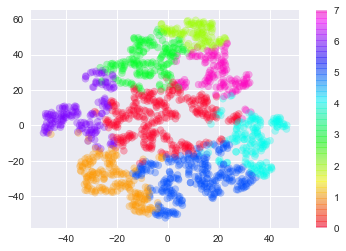

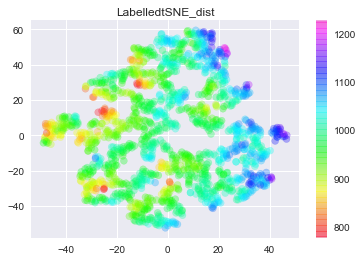

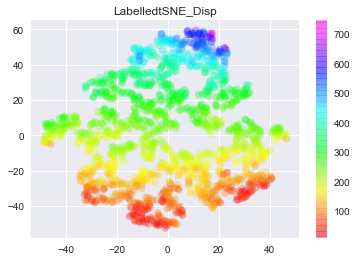

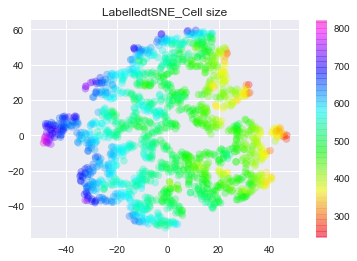

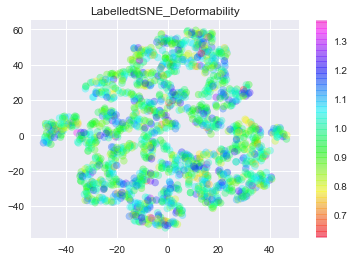

In [27]:
for JCC in ['1']:
    #fileName = 'Directed_Jcc'+JCC
    fileName = 'Random_Jcc'+JCC
    data_raw = pd.read_csv(fileName+'.csv')
    data_raw = data_raw.drop(labels=data_raw.columns[0], axis=1)
    
   # os.mkdir(fileName)
    os.chdir(fileName)
    

    numberofPCs=4
    pcaReducedData = performPCAAnalysis(data_raw, numberofPCs)

    numberofPCs=3
    pcaReducedData = performPCAAnalysis(data_raw, numberofPCs)

    maxNoOfClusters = 10
    calculateScoreForKMeanClustering(pcaReducedData, maxNoOfClusters)

    noOfClusters = 8
    X_embedded = performtSNEAnalysis(pcaReducedData,noOfClusters)

    for c in data_raw.columns:    
        plt.scatter(X_embedded[:,0],X_embedded[:,1],c = data_raw[c], cmap='gist_rainbow', alpha=0.3)
        plt.colorbar()
        plt.title('LabelledtSNE_'+c)
        plt.savefig('LabelledtSNE_'+c+'.png')
        plt.show()

    
    os.chdir('..')

In [14]:
os.chdir('..')